### Vérifier le bon téléchargement du dataset

In [ ]:
import os
import pandas as pd

root = "20bn-jester-v1"   # Modifie si ton dossier s'appelle différemment
dirs = [d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))]

print("Nombre de dossiers trouvés :", len(dirs))
print("Exemples :", dirs[:10])


Nombre de dossiers trouvés : 148092
Exemples : ['85648', '75617', '104170', '91491', '8032', '59505', '229', '59256', '138194', '135254']


### Nettoyer le fichier .csv de label 

<Axes: xlabel='label'>

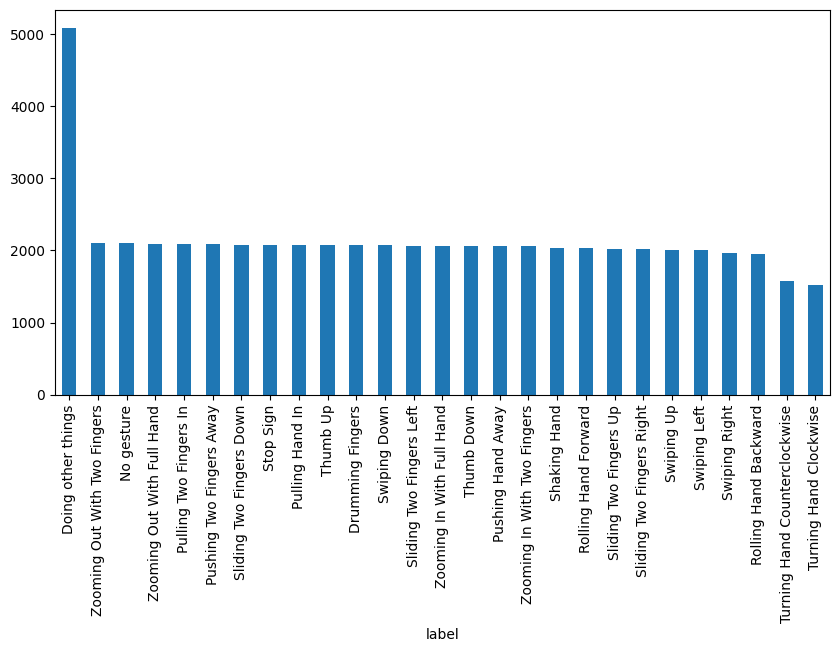

In [40]:
df = pd.read_csv("jester_labels_all.csv")
df["video_id"] = pd.to_numeric(df["video_id"], errors="coerce")
df = df[df["video_id"].notna()]

df["label_id"] = pd.to_numeric(df["label_id"], errors="coerce")
df = df[df["label_id"].notna()]


df["video_id"] = df["video_id"].astype(int)
df["label_id"] = df["label_id"].astype(int)

df.label.value_counts().plot(kind='bar', figsize=(10,5))



### Classer les différentes frames par label

In [41]:
root = "20bn-jester-v1"  # dossier contenant les vidéos extractées
out_root = "Jester_filtered_gestures"

os.makedirs(out_root, exist_ok=True)

In [43]:
def export_frames_fast(df, root, out_root, limit=None):
    rows = df if limit is None else df.head(limit)

    for _, row in rows.iterrows():
        vid = row['video_id']
        label = row['label']

        src_folder = os.path.join(root, str(vid))
        dst_folder = os.path.join(out_root, label)
        os.makedirs(dst_folder, exist_ok=True)

        frames = sorted(f for f in os.listdir(src_folder) if f.endswith(".jpg"))

        for frame in frames:
            src = os.path.join(src_folder, frame)
            dst = os.path.join(dst_folder, f"{vid}_{frame}")
            
            if not os.path.exists(dst):
                os.link(src, dst)     # HARDLINK

        print(f"✔️ Linked {vid} → {label}")

In [45]:
export_frames_fast(df, root, out_root)

✔️ Linked 1 → Doing other things
✔️ Linked 3 → Pushing Two Fingers Away
✔️ Linked 6 → Drumming Fingers
✔️ Linked 11 → Sliding Two Fingers Down
✔️ Linked 14 → Pushing Hand Away
✔️ Linked 17 → Shaking Hand
✔️ Linked 20 → Doing other things
✔️ Linked 28 → Pulling Two Fingers In
✔️ Linked 31 → Stop Sign
✔️ Linked 34 → Zooming In With Two Fingers
✔️ Linked 36 → Sliding Two Fingers Up
✔️ Linked 37 → Zooming Out With Two Fingers
✔️ Linked 41 → Shaking Hand
✔️ Linked 42 → Sliding Two Fingers Up
✔️ Linked 46 → Zooming In With Full Hand
✔️ Linked 50 → No gesture
✔️ Linked 51 → Swiping Right
✔️ Linked 55 → Thumb Down
✔️ Linked 56 → Rolling Hand Forward
✔️ Linked 58 → Zooming Out With Two Fingers
✔️ Linked 59 → Stop Sign
✔️ Linked 62 → Sliding Two Fingers Up
✔️ Linked 66 → Zooming In With Two Fingers
✔️ Linked 69 → Sliding Two Fingers Up
✔️ Linked 70 → No gesture
✔️ Linked 72 → Pulling Two Fingers In
✔️ Linked 74 → Zooming In With Two Fingers
✔️ Linked 75 → Doing other things
✔️ Linked 76 → Doing 